In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)
x = tf.zeros(shape=(2,1))
print(x)

2023-07-27 22:47:31.491078: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-27 22:47:31.528807: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


2023-07-27 22:47:33.516666: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8035 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6


In [2]:
x = tf.random.normal(shape=(3,1), mean=0,stddev=1.)
print(x)
x = tf.random.uniform(shape=(3, 1), minval=0, maxval=1.)
print(x)

tf.Tensor(
[[-0.09018345]
 [-0.05788039]
 [ 0.94281155]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[0.6618501 ]
 [0.088943  ]
 [0.39317083]], shape=(3, 1), dtype=float32)


In [3]:
import numpy as np

x = np.ones(shape=(2,2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [4]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [5]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.94676584],
       [ 1.22259   ],
       [-0.52545595]], dtype=float32)>


In [6]:
v[0, 0].assign(3.)


<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[ 3.        ],
       [ 1.22259   ],
       [-0.52545595]], dtype=float32)>

In [7]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.        ],
       [2.22259   ],
       [0.47454405]], dtype=float32)>

In [8]:
a = tf.ones((2,2))
b = tf.square(a)    # 제곱을 계산
c = tf.sqrt(a)      # 제곱근을 계산
d = b + c           # element-wise addition
e = tf.matmul(a, b) # dot product
# e *= d
b

2023-07-27 22:47:40.433921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [11]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [12]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [13]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
accleration = outer_tape.gradient(speed, time)
print(position, speed, accleration)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(9.8, shape=(), dtype=float32)


In [9]:
import numpy as np

arr = np.random.random((1,2,4,8))
arr_1 = np.random.random((8))
arr_2 = np.random.random((8, 10))
arr_3 = np.random.random((2, 8, 10))
arr_4 = np.random.random((3, 2, 8, 10))
arr_5 = np.random.random((4, 3, 2, 8, 10))
arr.shape

(1, 2, 4, 8)

In [2]:
result = np.dot(arr, arr_1)
print(result.shape)
result = np.dot(arr, arr_2)
print(result.shape)
result = np.dot(arr, arr_3)
print(result.shape)
result = np.dot(arr, arr_4)
print(result.shape)
result = np.dot(arr, arr_5)
print(result.shape)

(1, 2, 4)
(1, 2, 4, 10)
(1, 2, 4, 2, 10)
(1, 2, 4, 3, 2, 10)
(1, 2, 4, 4, 3, 2, 10)


In [3]:
x = np.random.random((32, 10))
# 10은 가능,
y = np.random.random((10, ))
# 32는 불가
# y = np.random.random((32, ))
np.expand_dims(y, axis=0)
print((x + y).shape)

(32, 10)


In [4]:
# # X.shape == (32,10), y.shape == (10,)
# X = np.random.random((32, 10))
# y = np.random.random((32, ))
# x = X.copy()
# for i in range(x.shape[0]):
#     for j in range(x.shape[1]):
#             x[i, j] += y[j]

In [5]:
arr

array([[[[0.87886512, 0.18023969, 0.88427251, 0.61277952, 0.79760869,
          0.0221977 , 0.95061332, 0.42693315],
         [0.18928834, 0.6311658 , 0.43476968, 0.35198079, 0.50888852,
          0.16448016, 0.17719971, 0.43290431],
         [0.34015353, 0.39144741, 0.9407369 , 0.65421081, 0.53023131,
          0.670604  , 0.95547336, 0.08915469],
         [0.91946699, 0.75776498, 0.1061422 , 0.91395618, 0.53951749,
          0.8003327 , 0.29348939, 0.65489864]],

        [[0.56127877, 0.95178776, 0.21174182, 0.63078643, 0.77483484,
          0.71791739, 0.33828658, 0.05087742],
         [0.75757946, 0.52612406, 0.21744838, 0.65712437, 0.58660006,
          0.51859922, 0.21181875, 0.25619877],
         [0.99506686, 0.60274968, 0.44440793, 0.60911154, 0.77476276,
          0.35528124, 0.77979434, 0.12602188],
         [0.17276675, 0.34030107, 0.08475886, 0.00837026, 0.70960428,
          0.74669235, 0.42536112, 0.13859235]]]])

In [6]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)
positivee_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class
)

In [7]:
print(negative_samples[0])
print(positivee_samples[0])

[1.7681047 3.8286176]
[3.98992785 0.35313124]


In [8]:
inputs = np.vstack((negative_samples, positivee_samples)).astype(np.float32)
inputs.shape

(2000, 2)

In [9]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

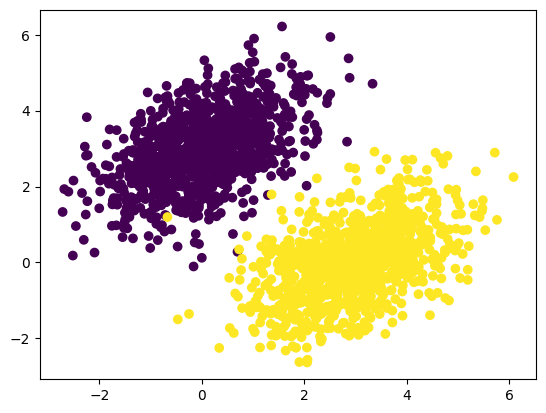

In [10]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:,1], c= targets[: ,0])
plt.show()

In [11]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

2023-07-27 08:12:07.020166: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-27 08:12:07.056242: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 08:12:09.020899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8035 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:1a:00.0, compute capability: 8.6


In [12]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [13]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) 
    return tf.reduce_mean(per_sample_losses)

In [14]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [15]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실 : {loss:4f}')

0번째 스텝의 손실 : 2.021768
1번째 스텝의 손실 : 0.358753
2번째 스텝의 손실 : 0.148432
3번째 스텝의 손실 : 0.114963
4번째 스텝의 손실 : 0.104558
5번째 스텝의 손실 : 0.097602
6번째 스텝의 손실 : 0.091555
7번째 스텝의 손실 : 0.086056
8번째 스텝의 손실 : 0.081021
9번째 스텝의 손실 : 0.076407
10번째 스텝의 손실 : 0.072180
11번째 스텝의 손실 : 0.068305
12번째 스텝의 손실 : 0.064754
13번째 스텝의 손실 : 0.061500
14번째 스텝의 손실 : 0.058518
15번째 스텝의 손실 : 0.055785
16번째 스텝의 손실 : 0.053280
17번째 스텝의 손실 : 0.050984
18번째 스텝의 손실 : 0.048881
19번째 스텝의 손실 : 0.046953
20번째 스텝의 손실 : 0.045186
21번째 스텝의 손실 : 0.043567
22번째 스텝의 손실 : 0.042083
23번째 스텝의 손실 : 0.040723
24번째 스텝의 손실 : 0.039477
25번째 스텝의 손실 : 0.038335
26번째 스텝의 손실 : 0.037288
27번째 스텝의 손실 : 0.036329
28번째 스텝의 손실 : 0.035450
29번째 스텝의 손실 : 0.034644
30번째 스텝의 손실 : 0.033906
31번째 스텝의 손실 : 0.033229
32번째 스텝의 손실 : 0.032609
33번째 스텝의 손실 : 0.032041
34번째 스텝의 손실 : 0.031520
35번째 스텝의 손실 : 0.031043
36번째 스텝의 손실 : 0.030605
37번째 스텝의 손실 : 0.030204
38번째 스텝의 손실 : 0.029837
39번째 스텝의 손실 : 0.029500


(2000, 1)


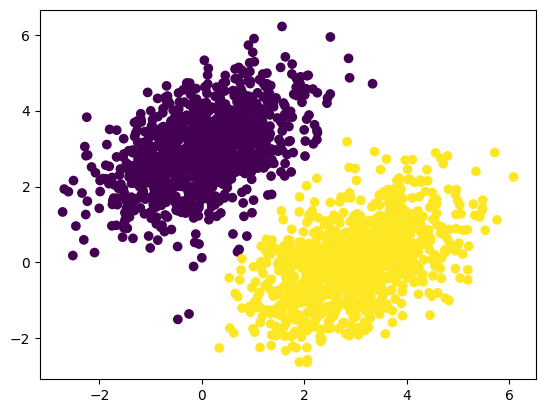

In [16]:
predictions = model(inputs)
print(predictions.shape)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[: ,0]>0.5)
plt.show()

아래의 코드 설명
포인트

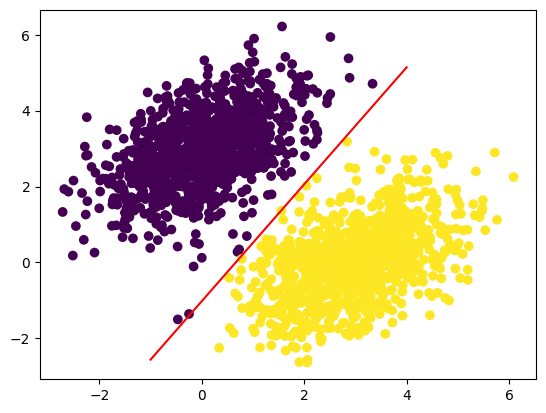

In [17]:
x = np.linspace(-1, 4)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0]>0.5)
plt.show()

In [20]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
  
  
    def build(self, input_shape):  # build() 메서드에서 가중치를 생성합니다.
        input_dim = input_shape[-1]
        # add_weight는 가중치를 간편하게 만들 수 있는 메서드입니다. self.W = tf.Variable(tf.random.uniform(w_shape))
        # 와 같이 독립적으로 변수를 생성하고 층의 속성으로 할당할 수도 있습니다.
        self.W = self.add_weight(shape=(input_dim, self.units),
                                    initializer='random_normal')
        
        self.b = self.add_weight(shape=(self.units,),
                                    initializer="zeros")
  
    def call(self, inputs): # call 메서드에서 정방향 패스 계산을 정의합니다.
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [22]:
my_dense=SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


(2, 32)


In [24]:
from tensorflow.keras import layers

layer = layers.Dense(32, activation="relu") # 32개의 출력 유닛을 가진 밀집 층

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [27]:
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

In [28]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop',
              loss = 'mean_squared_error',
              metrics=['accuracy'])

In [29]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [32]:
history = model.fit(
    inputs,  # 입력 샘플(넘파이 배열)
    targets, # 훈련 타깃
    epochs=5, # 훈련 횟수
    batch_size=128  # 배치 크김
)

Epoch 1/5
16/16 [==============================] - 0s 3ms/step - loss: 6.5832 - binary_accuracy: 0.9970
Epoch 2/5
16/16 [==============================] - 0s 4ms/step - loss: 6.3338 - binary_accuracy: 0.9970
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 6.0903 - binary_accuracy: 0.9965
Epoch 4/5


16/16 [==============================] - 0s 4ms/step - loss: 5.8527 - binary_accuracy: 0.9965
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 5.6214 - binary_accuracy: 0.9965


In [33]:
history.history

{'loss': [6.583237171173096,
  6.333796501159668,
  6.09025764465332,
  5.852660179138184,
  5.621424198150635],
 'binary_accuracy': [0.996999979019165,
  0.996999979019165,
  0.9965000152587891,
  0.9965000152587891,
  0.9965000152587891]}

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

In [36]:
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 [==============================] - 1s 5ms/step - loss: 0.4594 - binary_accuracy: 0.8793 - val_loss: 0.0718 - val_binary_accuracy: 0.9750
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0776 - binary_accuracy: 0.9564 - val_loss: 0.0294 - val_binary_accuracy: 0.9917
Epoch 3/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0766 - binary_accuracy: 0.9464 - val_loss: 0.2333 - val_binary_accuracy: 0.7750
Epoch 4/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0688 - binary_accuracy: 0.9607 - val_loss: 0.0910 - val_binary_accuracy: 0.9083
Epoch 5/5
88/88 [==============================] - 1s 6ms/step - loss: 0.0743 - binary_accuracy: 0.9564 - val_loss: 0.0501 - val_binary_accuracy: 0.9800


In [37]:
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 3ms/step - loss: 0.0501 - binary_accuracy: 0.9800


In [38]:
predictions = model(new_inputs)

NameError: name 'new_inputs' is not defined

In [ ]:
predictions = model.predict(new_inputs, batch_size=128)